# Tutorial: Reading Rigol Stored Waveforms

**Scott Prahl**

**Jan 2020**

In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

import RigolWFM.wfm as wfm

def read_wfm(filter_name, wfm_file):
    result = subprocess.run(["python", filter_name, "csv", wfm_file], capture_output=True)

    # split on the linefeeds
    alist  = np.array(result.stdout.decode().split('\n'))
    
    # drop the first two columns (header) and the last (empty)
    blist = alist[2:-1]
    
    t = np.zeros_like(blist, dtype=float)
    y = np.zeros_like(blist, dtype=float)

    # the extra comma on each line means that split returns three values not two
    for i,row in enumerate(blist):
        row_val = str(row).split(',')
        t[i] = row_val[0]
        y[i] = row_val[1]
    return t,y

In [2]:
def convert_wfm(wfm_file):

    try:
        f = open(wfm_file, 'rb')
    except (OSError, IOError) as e:
        print('Unable to open %s for reading.' % filename)
        return

    try:
        scopeData = wfm.parseRigolWFM(f)
    except wfm.FormatError:
        print("Format does not follow the known file format.")
        return

    f.close()
    
    if scopeData["alternateTrigger"]:
        data = np.zeros(4, dtype=np.array)
        data[0] = np.array(scopeData["channel"][1]["samples"]["time"])
        data[1] = np.array(scopeData["channel"][1]["samples"]["volts"])
        data[2] = np.array(scopeData["channel"][2]["samples"]["time"])
        data[3] = np.array(scopeData["channel"][2]["samples"]["volts"])
        return data

    channels = []
    for channel in range(1,3):
        if scopeData["channel"][channel]["enabled"]:
            channels.append(channel)

    data = []
    data.append(scopeData["channel"][channels[0]]["samples"]["time"])
    for channel in channels:
        data.append(scopeData["channel"][channel]["samples"]["volts"])

    return np.array(data)

def describe_wfm(wfm_file):

    try:
        f = open(wfm_file, 'rb')
    except (OSError, IOError) as e:
        print('Unable to open %s for reading.' % filename)
        return

    try:
        scopeData = wfm.parseRigolWFM(f)
    except wfm.FormatError:
        print("Format does not follow the known file format.", file=sys.stderr)
        return
    
    desc = wfm.describeScopeData(scopeData)
    f.close()
    return desc

## Introduction

So you have saved a trace with the Rigol scope as a file and want to use it in a lab report.  You opted not to change the default to csv format and are stuck with a file names `test.wfm`

One option is to go to [Rigol](https://rigol.desk.com/customer/en/portal/articles/2282335-wfm-converter) and download their converter.

If you want to work completely within the Jupyter notebook framework then you'll need to download a library.

In [3]:
#import sys
#!{sys.executable} -m pip install pyRigolWFM


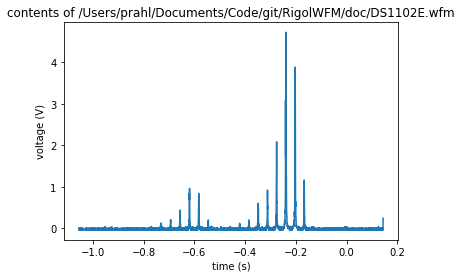

In [10]:
app = "/Users/prahl/Documents/Code/git/rigol_wfm/wfmutil.py"
file = "/Users/prahl/Documents/Code/git/RigolWFM/doc/DS1102E.wfm"

result = subprocess.run(["python", app, "csv", file], capture_output=True)

t, y = read_wfm(app,file)
plt.plot(t,y)
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.title("contents of %s" % file)
plt.show()

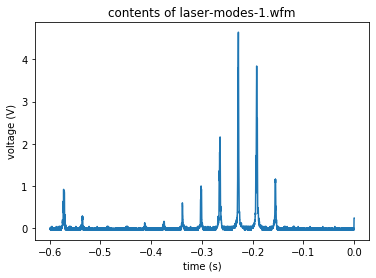

In [5]:
file = "laser-modes-1.wfm"

result = subprocess.run(["python", app, "csv", file], capture_output=True)

t, y = read_wfm(app,file)
plt.plot(t,y)
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.title("contents of %s" % file)
plt.show()

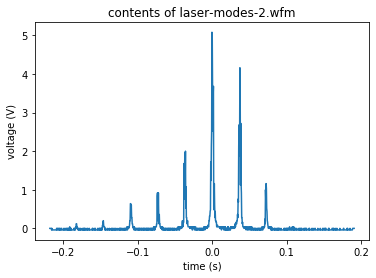

In [6]:
file = "laser-modes-2.wfm"

result = subprocess.run(["python", app, "csv", file], capture_output=True)

t, y = read_wfm(app,file)
plt.plot(t,y)
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.title("contents of %s" % file)
plt.show()

In [7]:
dir(wfm)

['FormatError',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_parseFile',
 'array',
 'collections',
 'decodeNullTerminatedStr',
 'describe',
 'describeScopeData',
 'getCenterValue',
 'getRecordLength',
 'np',
 'parseRigolWFM',
 'signals',
 'struct']

In [8]:
data = wfm.signals("DS1052E.wfm")

t,y = data
plt.plot(t,y)
plt.show()


Format does not follow the known file format. Try the --forgiving option.
If you'd like to help development, please report this error:

Field unknown1 == 65281 not met, got 42405


ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
x = describe_wfm("laser-modes-0.wfm")
print(x)

In [ ]:
dir(RigolWFM)